## The task of Machine Learning

What is your job? To build a model. But first, know your data!




What is a machine learning model? 

* it learns from labelled data, e.g. ...
* and the predicts on unlabelled data.


In Kaggle, these are called train and test sets because ...

* You want to build a model that learns patterns in the training set
* You _then_ use the model to make predictions on the test set!

Kaggle then tells you the percentage that you got correct: this is known as the _accuracy_ of your model.

Process:

* Check out data (EDA);
* Build quick and dirty model (baseline);
* Iterate
* Engineer features
* Get model that performs better.


**KEY:** Models need to generalize to unseen data.

## Import you data and check it out

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
# Import test and train datasets
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

# View first lines of training data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# View first lines of test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


* Use the DataFrame `.info()` method to check out datatypes, missing values and more (of `df_train`).

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* Use the DataFrame `.describe()` method to check out summary statistics of numeric columns (of `df_train`).

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visual exploratory data analysis and your first model

* Use `seaborn` to build a bar plot of Titanic survival (your _target variable_).

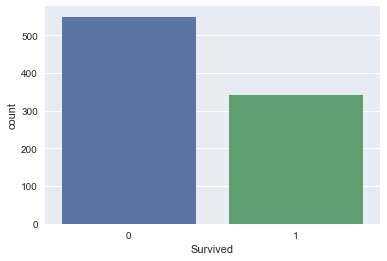

In [6]:
sns.countplot(x='Survived', data=df_train);

In the training set, less people survived than didn't. Let's then build a first model that **predict that nobody survided**.

This is a bad model as we know that people survived. But it gives us a _baseline_: any model that we build later needs to do better than this one.

* Create a column 'Survived' for `df_test` that encodes 'did not survive' for all rows;
* Save 'PassengerId' and 'Survived' columns of `df_test` to a .csv and submit to Kaggle.

In [7]:
df_test['Survived'] = 0
df_test[['PassengerId', 'Survived']].to_csv('data/predictions/no_survivors.csv', index=False)

* What accuracy did this give you?

Accuracy on Kaggle = 62.7

## EDA on feature variables

* Use `seaborn` to build a bar plot of the Titanic dataset feature 'Sex' (of `df_train`).

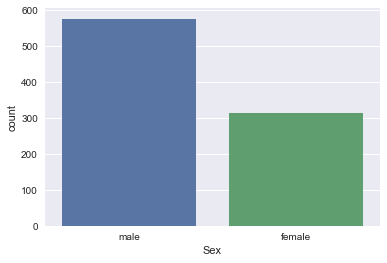

In [33]:
sns.countplot(x='Sex', data=df_train);

* Use `seaborn` to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Sex'.

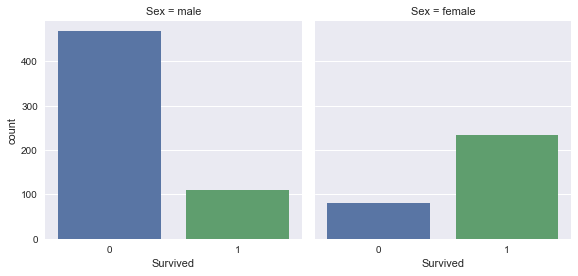

In [10]:
sns.factorplot(x='Survived', col='Sex', data=df_train, kind='count');

* Use `pandas` to figure out how many women and how many men survived.

In [11]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

* Use `pandas` to figure out the proportion of women that survived, along with the proportion of men:

In [36]:
print(df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print(df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

0.742038216561
0.188908145581


74% of women survived, while 18% of men survived.

Let's now build a second model and predict that all women survived and all men didn't. Once again, this is an unrealistic model, but it will provide a baseline against which to compare future models.

* Create a column 'Survived' for `df_test` that encodes the above prediction.
* Save 'PassengerId' and 'Survived' columns of `df_test` to a .csv and submit to Kaggle.

In [15]:
df_test['Survived'] = (df_test.Sex == 'female').apply(lambda x: int(x))

In [16]:
df_test[['PassengerId', 'Survived']].to_csv('data/predictions/women_sex.csv', index=False)

Accuracy on Kaggle = 76.6

## Explore your data more!

* Use `seaborn` to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Pclass'.

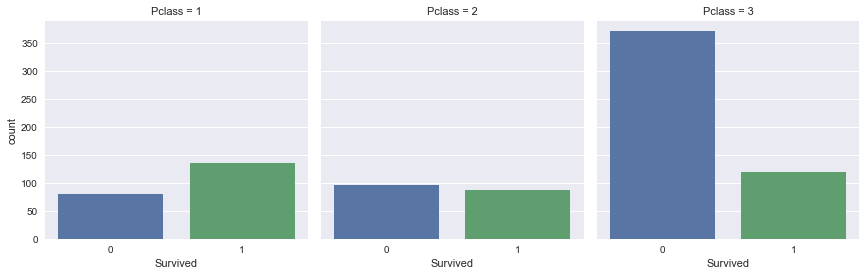

In [38]:
sns.factorplot(x='Survived', col='Pclass', data=df_train, kind='count');

* Use `seaborn` to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Embarked'.

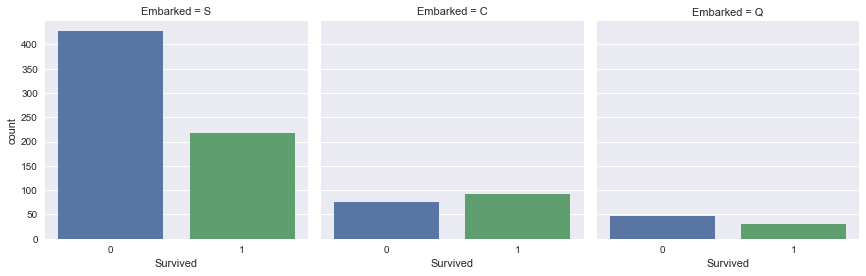

In [39]:
sns.factorplot(x='Survived', col='Embarked', data=df_train, kind='count');

## EDA with numeric variables

* Use `seaborn` to plot a histogram of the 'Fare' column of `df_train`.

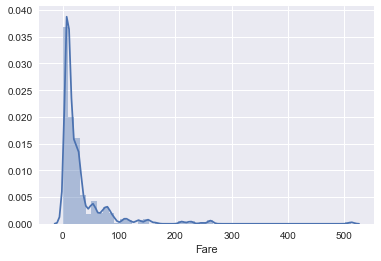

In [19]:
sns.distplot(df_train.Fare);

* Use a `pandas` plotting method to plot the column 'Fare' for each value of 'Survived' on the same plot.

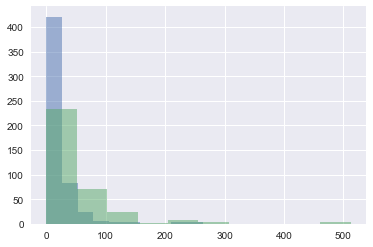

In [20]:
df_train.groupby('Survived').Fare.hist(alpha=0.5);

* Use `seaborn` to plot a histogram of the 'Age' column of `df_train`. _Hint_: you may need to drop null values before doing so.

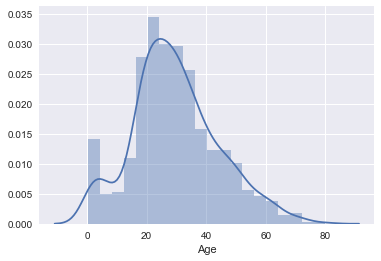

In [42]:
df_train_drop = df_train.dropna(subset=['Age'])
sns.distplot(df_train_drop.Age);

* Plot a strip plot & a swarm plot of 'Fare' with 'Survived' on the x-axis.

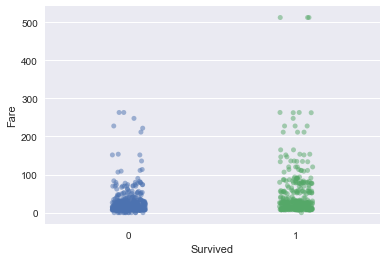

In [22]:
sns.stripplot(x='Survived', y='Fare', data=df_train, jitter=True, alpha=0.5);

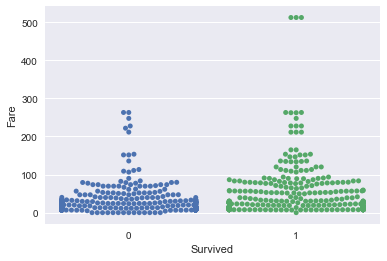

In [23]:
sns.swarmplot(x='Survived', y='Fare', data=df_train);

* Use the DataFrame method `.dsecribe()` to check out summary statistics of 'Fare' as a function of survival.

In [25]:
df_train.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


* Use `seaborn` to plot a scatter plot of 'Age' against 'Fare', colored by 'Survived'.

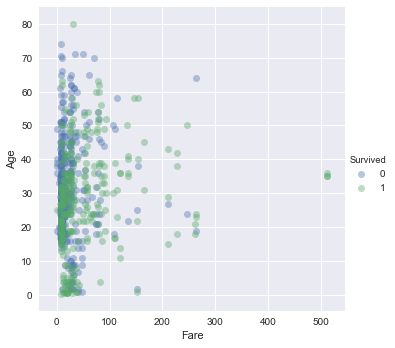

In [27]:
sns.lmplot(x="Fare", y='Age', hue='Survived', data=df_train, fit_reg=False, scatter_kws={'alpha':0.4});

* Use `seaborn` to create a pairplot of `df_train`, colored by 'Survived'.

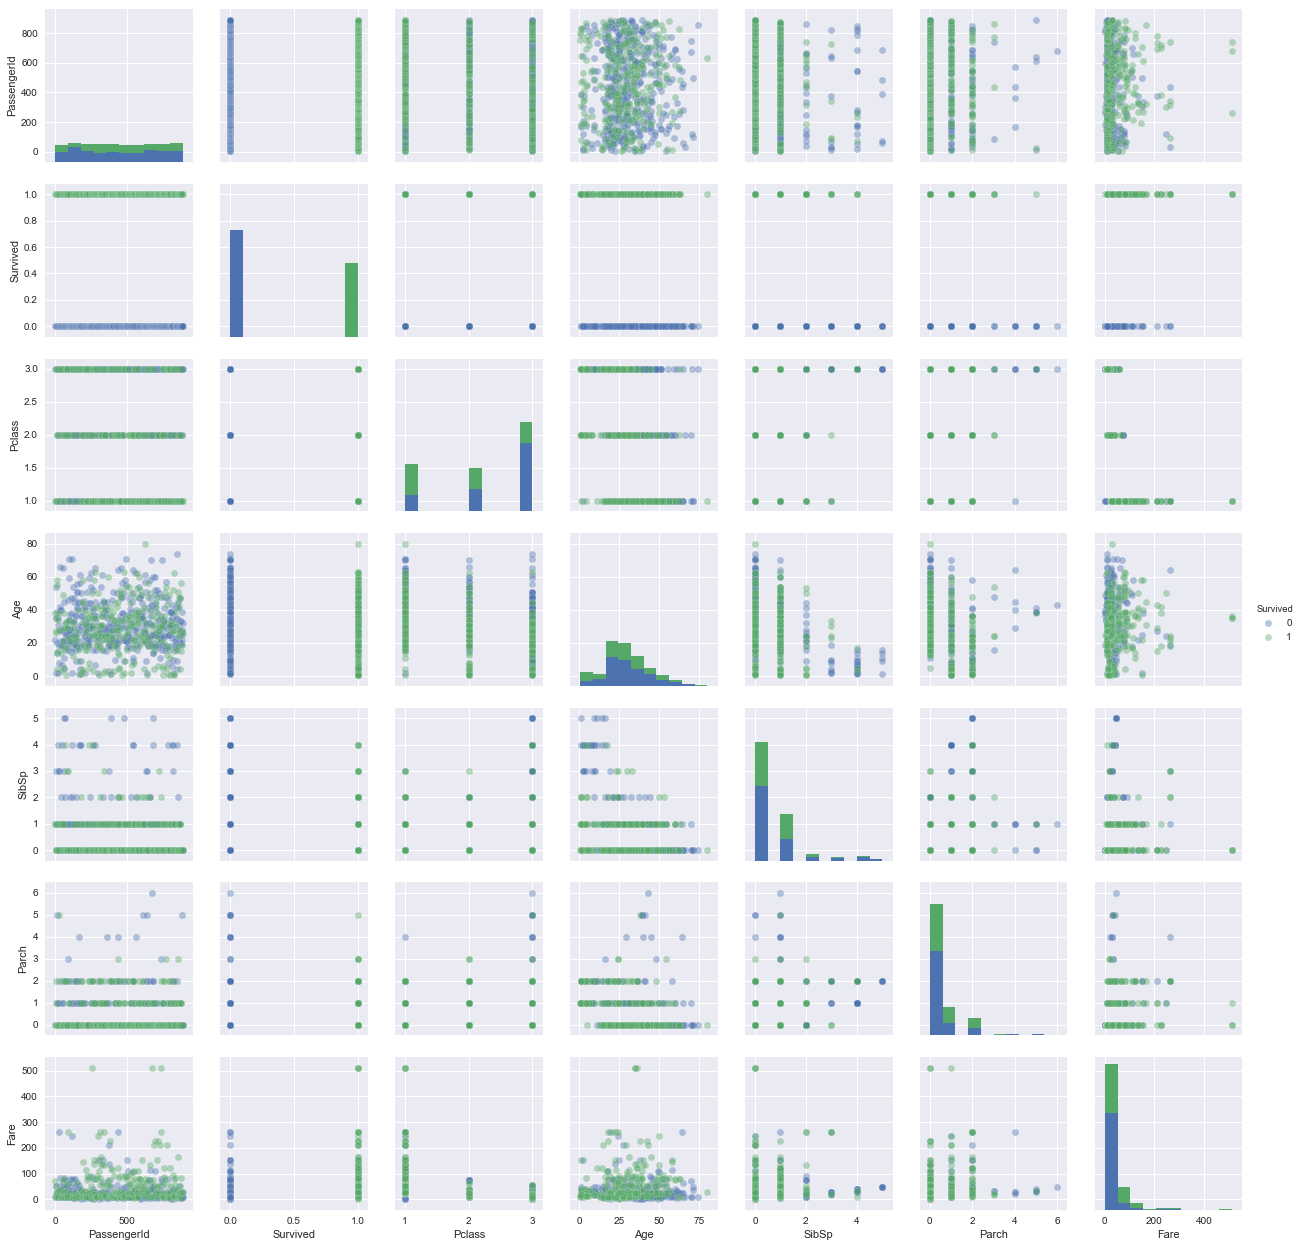

In [46]:
sns.pairplot(df_train_drop , hue="Survived", plot_kws={'alpha': 0.4});